# PolynomialFeatures

"A regressão linear gera um modelo linear. Adicionar termos polinomiais ao modelo pode ser uma forma efetiva de permiti-lo identificar padrões não-lineares."


Adaptado de: Kuhn, Max, and Kjell Johnson. Feature engineering and selection: A practical approach for predictive models. CRC Press, 2019.

## Como funciona?

Suponha que temos uma base de dados $D$ que possui variáveis independentes $A, B$ e variável dependente $T$. Uma observação dessa base é dada por $(a_0, b_0)$, com valor $t_0$. 


* Uma aproximação linear de $t_0$ (suponha que os valores  $\beta_i$ foram encontrados utilizando algum algoritmo como mínimos quadrados) pode ser dada por:

  $t^{(1)}_0=f^{(1)}(a_0, b_0)= \beta^{(1)}_0 + \beta^{(1)}_1 a_0 + \beta^{(1)}_2 b_0 $

* Uma aproximação quadrática (polinômio de segundo grau) da função pode ser vista da forma:

  $t^{(2)}_0=f^{(2)}(a_0, b_0)= \beta^{(2)}_0 + \beta^{(2)}_1 a_0 + \beta^{(2)}_2 b_0 + \beta^{(2)}_3 a_0^2 + \beta^{(2)}_4 b_0^2 + \beta^{(2)}_5 a_0 b_0$

* Note que podemos encarar "aproximar via polinômio de segundo grau" como "aproximar via função linear" se considerarmos $a_0^2$, $b_0^2$ e $a_0b_0$ como novas variáveis, $c_0, d_0$ e $e_0$ no problema:

  $t^{(3)}_0=f^{(3)}(a_0, b_0, c_0, d_0, e_0)= \beta^{(3)}_0 + \beta^{(3)}_1 a_0 + \beta^{(3)}_2 b_0 + \beta^{(3)}_3 c_0 + \beta^{(3)}_4 d_0 + \beta^{(3)}_5 e_0$

* Basta que realizemos a transformação de $(a, b)$ para $(a, b, c, d, e)$, com $c=a^2, d=b^2$ e $e=ab$.

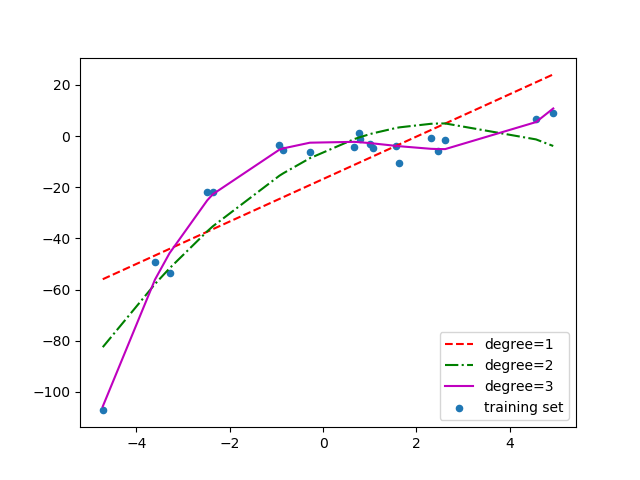


Fonte: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 

Felizmente a classe **PolynomialFeatures** é bastante útil nesse momento, pois ela nos permite realizar essa transformação facilmente, de forma que consigamos utilizar a mesma sintaxe utilizado anteriormente para adaptar nosso modelo linear.

Basta inicializar um polinômio e transformar o conjunto de dados, por exemplo:

```python
p = PolynomialFeatures(degree=grau)
X_Transf = p.fit_transform(X)
```

E agora ao invés de adaptar nosso modelo linear ao conjunto X, adaptamos ao conjunto X_Transf.


In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#3 observações de 2 variáveis independentes e 1 variável dependente (ultima coluna)
# Esse conjunto foi gerado como f(x0, x1) = 3 + 4x1 - 2x0x1 + x0^2
data = np.array([[1, 2, 8],
              [3, 4, 4],
              [0, 0, 3],
              [1, 1, 6],
              [-1, 4, 28],
              [5, 6, -8]])

X = data[:, :-1]
y = data[:, -1]
# Utilizando um polinomio de grau 2
p = PolynomialFeatures(degree=2, include_bias=False)

X_Transf = p.fit_transform(X)
#print(p.feature_names_in_())
print(X_Transf)

[[ 1.  2.  1.  2.  4.]
 [ 3.  4.  9. 12. 16.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [-1.  4.  1. -4. 16.]
 [ 5.  6. 25. 30. 36.]]


Portanto o realizar regressão linear no conjunto transformado (data_Transf) corresponde a realizar regressão polinomial de grau 2 no conjunto original (data)

In [4]:
from sklearn.linear_model import LinearRegression

# Note que nesse caso colocamos fit_intercept = False pois já capturamos o 
# termo idependente ao fazermos a transformação anterior
lin = LinearRegression()
lin.fit(X_Transf, y)

print(lin.coef_.round(2))
print(lin.intercept_.round(2))
print(lin.score(X_Transf, y))

[ 0.  4.  1. -2.  0.]
3.0
1.0


### Atenção: Essa técnica aumenta muito o número de atributos! Isso pode gerar problemas!